In [1]:
# import numpy for handling arrays, and matplotlib.pyplot to generate plots
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # uncomment for high-DPI screens

In [2]:
## simulation input parameters ##

# initial concentrations
c_CH3CHO_0 = 10.0
c_CH3r_0 = 0.0
c_CHOr_0 = 0.0
c_CH4_0 = 0.0
c_CO_0 = 0.0
c_CH3COr_0 = 0.0
c_CH3CH3_0 = 0.0

# reation rates, k_1, k_2, k_3, and k_4
k1 = 1e-4
k2 = 0.1
k3 = 1
k4 = 1

In [3]:
from math import sqrt

# functions defining the rate equations
def d_CH3CHO_by_d_t( c_CH3CHO, c_CH3r, k1, k2 ):
    return ( - k1 * c_CH3CHO
             - k2 * c_CH3CHO * c_CH3r )

def d_CH3r_by_d_t( c_CH3CHO, c_CH3r, c_CH3COr, k1, k2, k3, k4 ):
    return ( + k1 * c_CH3CHO
             - k2 * c_CH3CHO * c_CH3r
             + k3 * c_CH3COr
             - k4 * c_CH3r**2 * 2.0 )

def d_CHOr_by_d_t( c_CH3CHO, c_CH3r, k1 ):
    return ( + k1 * c_CH3CHO )

def d_CH3COr_by_d_t( c_CH3CHO, c_CH3r, c_CH3COr, k2, k3 ):
    return ( + k2 * c_CH3CHO * c_CH3r
             - k3 * c_CH3COr )

def d_CH4_by_d_t( c_CH3CHO, c_CH3r, k2 ):
    return ( + k2 * c_CH3CHO * c_CH3r )

def d_CO_by_d_t( c_CH3COr, k3 ):
    return ( + k3 * c_CH3COr )

def d_CH3CH3_by_d_t( c_CH3r, k4 ):
    return ( + k4 * c_CH3r**2 )

def d_CH4_by_d_t_SSA( c_CH3CHO, k1, k2, k4 ):
    return ( k2 * sqrt( k1 / ( 2.0 * k4 ) ) * c_CH3CHO**1.5 )

In [4]:
# "Technical" Simulation Parameters
# delta_t is the time between simulation timesteps
delta_t = 0.01
# the simulation is run for n_steps steps.
n_steps = 50000
# so the total simulation time is n_steps * delta_t

In [5]:
# create arrays to store the simulation trajectories
conc_CH3CHO = np.zeros( n_steps )
conc_CH3r   = np.zeros( n_steps )
conc_CHOr   = np.zeros( n_steps )
conc_CH4    = np.zeros( n_steps )
conc_CH3COr = np.zeros( n_steps )
conc_CO     = np.zeros( n_steps )
conc_CH3CH3 = np.zeros( n_steps )

d_conc_CH3CHO_by_d_t  = np.zeros( n_steps )
d_conc_CH3r_by_d_t    = np.zeros( n_steps )
d_conc_CHOr_by_d_t    = np.zeros( n_steps )
d_conc_CH4_by_d_t     = np.zeros( n_steps )
d_conc_CH3COr_by_d_t  = np.zeros( n_steps )
d_conc_CO_by_d_t      = np.zeros( n_steps )
d_conc_CH3CH3_by_d_t  = np.zeros( n_steps )
d_conc_CH4_by_d_t_SSA = np.zeros( n_steps )

In [6]:
# Run the Simulation

# set the concentrations of A, B, and C to the initial concentrations
c_CH3CHO = c_CH3CHO_0
c_CH3r   = c_CH3r_0
c_CHOr   = c_CHOr_0
c_CH4    = c_CH4_0
c_CH3COr = c_CH3COr_0
c_CO     = c_CO_0
c_CH3CH3 = c_CH3CH3_0

# now loop over n_steps timesteps.
for step in range( n_steps ): 
    # store the concentrations at this simulation step so that we can plot them later
    conc_CH3CHO[ step ] = c_CH3CHO
    conc_CH3r[ step ]   = c_CH3r  
    conc_CHOr[ step ]   = c_CHOr 
    conc_CH4[ step ]    = c_CH4  
    conc_CH3COr[ step ] = c_CH3COr
    conc_CO[ step ]     = c_CO   
    conc_CH3CH3[ step ] = c_CH3CH3

    # store the rate of change of [A], [B], and [C] at this simulation step so that we can plot them later
    d_conc_CH3CHO_by_d_t[ step ]  = d_CH3CHO_by_d_t( c_CH3CHO, c_CH3r, k1, k2 )
    d_conc_CH3r_by_d_t[ step ]    = d_CH3r_by_d_t( c_CH3CHO, c_CH3r, c_CH3COr, k1, k2, k3, k4 )
    d_conc_CHOr_by_d_t[ step ]    = d_CHOr_by_d_t( c_CH3CHO, c_CH3r, k1 )
    d_conc_CH4_by_d_t[ step ]     = d_CH4_by_d_t( c_CH3CHO, c_CH3r, k2 )
    d_conc_CH3COr_by_d_t[ step ]  = d_CH3COr_by_d_t( c_CH3CHO, c_CH3r, c_CH3COr, k2, k3 )
    d_conc_CO_by_d_t[ step ]      = d_CO_by_d_t( c_CH3COr, k3 )
    d_conc_CH3CH3_by_d_t[ step ]  = d_CH3CH3_by_d_t( c_CH3r, k4 )
    d_conc_CH4_by_d_t_SSA[ step ] = d_CH4_by_d_t_SSA( c_CH3CHO, k1, k2, k4 )
    
    # calculate the concentrations at t + Δt
    # each concentration is changed by ( d[x]/dt × Δt )
    c_CH3CHO += d_conc_CH3CHO_by_d_t[ step ] * delta_t
    c_CH3r   += d_conc_CH3r_by_d_t[ step ]   * delta_t
    c_CHOr   += d_conc_CHOr_by_d_t[ step ]   * delta_t
    c_CH4    += d_conc_CH4_by_d_t[ step ]    * delta_t
    c_CH3COr += d_conc_CH3COr_by_d_t[ step ] * delta_t
    c_CO     += d_conc_CO_by_d_t[ step ]     * delta_t
    c_CH3CH3 += d_conc_CH3CH3_by_d_t[ step ] * delta_t

In [7]:
# we want to plot our simulation data against time, 
# so we generate an array of times at every simulation step
time = np.arange( n_steps ) * delta_t

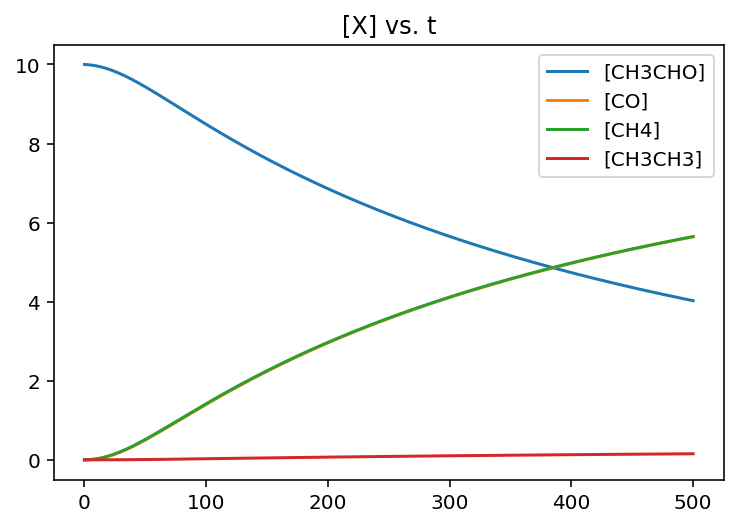

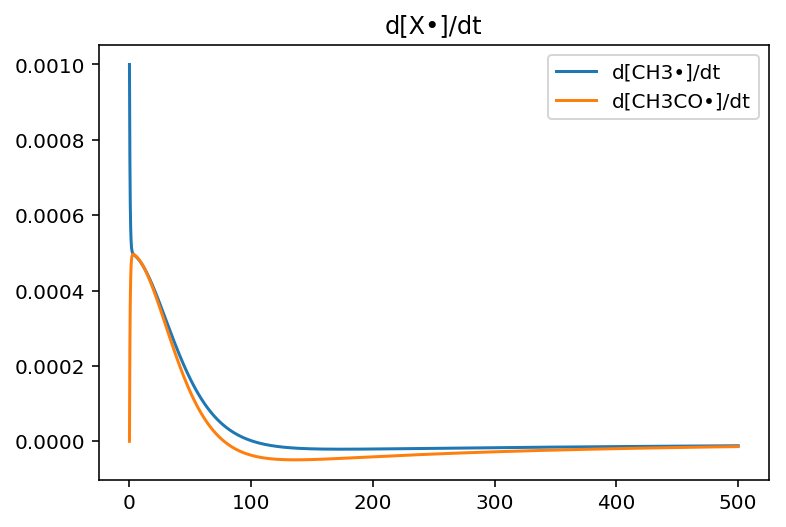

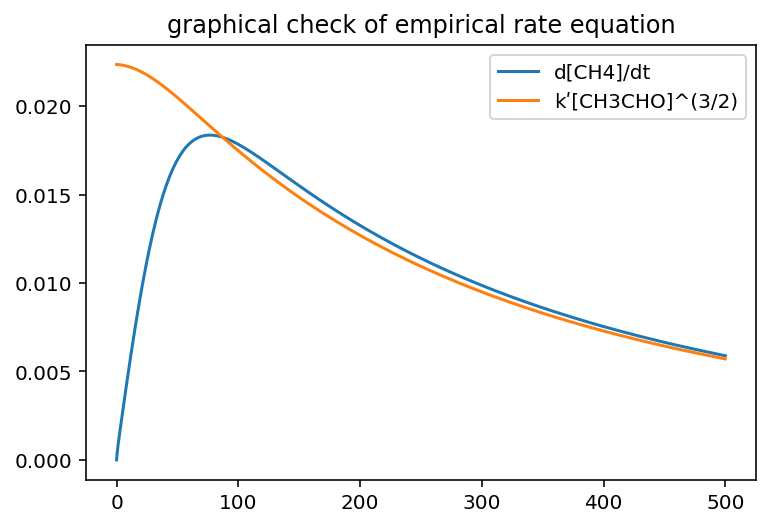

In [8]:
## plot the simulation data ##

# plot [X] vs. time
plt.plot( time, conc_CH3CHO, label='[CH3CHO]' )
plt.plot( time, conc_CO, label='[CO]' )
plt.plot( time, conc_CH4, label='[CH4]' )
plt.plot( time, conc_CH3CH3, label='[CH3CH3]' )
plt.legend()
plt.title('[X] vs. t')
plt.show()

plt.plot( time, d_conc_CH3r_by_d_t, label='d[CH3•]/dt' )
plt.plot( time, d_conc_CH3COr_by_d_t, label='d[CH3CO•]/dt' )
plt.legend()
plt.title('d[X•]/dt')
plt.show()

plt.plot( time, d_conc_CH4_by_d_t, label='d[CH4]/dt' )
plt.plot( time, d_conc_CH4_by_d_t_SSA, label='kʹ[CH3CHO]^(3/2)' )
plt.legend()
plt.title('graphical check of empirical rate equation')
plt.show()